In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
my_color_palette =  {'Dz 5mg/kg':'#8FB996','NaCl':'#594157', 'PTZ':'#c7991a'}

In [32]:
# Load data for an exemple block
animal = "Ent_CamK2_09"
sessions = ["S09","S10","S11"]
cnd_per_sessions = {"S09":"PTZ","S10":"NaCl","S11":"Dz 5mg/kg"}

number_sessions = len(sessions)
window_before = 5
window_after = 30
Sampling_freq = 100

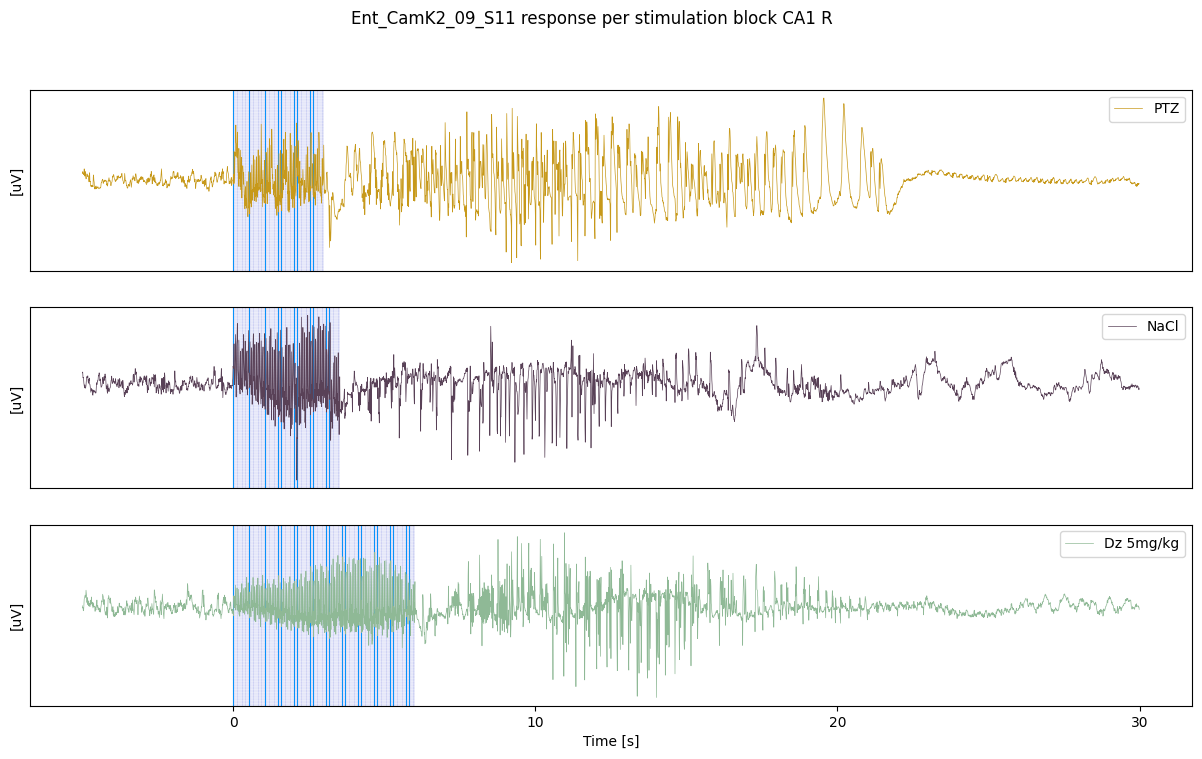

In [36]:
# Plot all three seizures
fig1 = plt.figure(filename + '_stimulation_block', figsize=(15, 8)).suptitle(filename + ' response per stimulation block CA1 R')
gridspec.GridSpec(number_sessions, 12)
x = np.arange(-window_before, window_after, 1 / Sampling_freq)
j = 0
for session in sessions:
    # Load data
    filename = animal+'_'+session
    data_sz = np.load('Mice_data/'+filename+'_data_sz.npy')
    event_sz = np.load('Mice_data/'+filename+'_events_sz.npy')
    condition = cnd_per_sessions[session]

    # Plot Sz
    ax = plt.subplot2grid((number_sessions, 12), (j, 0), rowspan=1, colspan=12)
    ax.plot(x, data_sz, color=my_color_palette[condition], lw=0.5, label=condition)
    for i in np.nditer(event_sz):
        ax.axvspan(i, i + 0.003,edgecolor='#1B2ACC', facecolor='#089FFF', linestyle="--", lw=0.1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel('[uV]')
    ax.legend()
    j += 1
    if j == number_sessions:
        ax.set_xlabel('Time [s]')
        ax.set_xticks([0,10,20,30])